In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

In [44]:
# csv 불러오기
fill2 = pd.read_csv("Fill2 dispensing.csv")
target = pd.read_csv("train_y.csv")

# 타깃값과 merge
df_fill2 = pd.merge(fill2, target, "inner", on="Set ID")

/var/folders/c6/kvlszyfj2q9_tv_8pb0y40qm0000gn/T/ipykernel_2120/2969718679.py:2: DtypeWarning: Columns (62,64) have mixed types. Specify dtype option on import or set low_memory=False.
  fill2 = pd.read_csv("Fill2 dispensing.csv")


In [6]:
# 출력값 잘리지 않게
pd.set_option('display.max_rows', None)

In [7]:
# info 잘리지 않게 출력
df_fill2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42666 entries, 0 to 42665
Data columns (total 133 columns):
 #    Column             Dtype  
---   ------             -----  
 0    Wip Line           object 
 1    Process Desc.      object 
 2    Equipment          object 
 3    Model.Suffix       object 
 4    Workorder          object 
 5    LOT ID             object 
 6    Set ID             object 
 7    Box ID             float64
 8    Collect Date       object 
 9    Insp. Seq No.      int64  
 10   Insp Judge Code    object 
 11   Collect Result     int64  
 12   Unit Time          float64
 13   Judge Value        float64
 14   Collect Result.1   int64  
 15   Unit Time.1        float64
 16   Judge Value.1      float64
 17   Collect Result.2   int64  
 18   Unit Time.2        float64
 19   Judge Value.2      float64
 20   Collect Result.3   int64  
 21   Unit Time.3        float64
 22   Judge Value.3      float64
 23   Collect Result.4   int64  
 24   Unit Time.4        float64

In [8]:
# null값 확인
df_fill2.isnull().sum()

Wip Line                 0
Process Desc.            0
Equipment                0
Model.Suffix             0
Workorder                0
LOT ID                   0
Set ID                   0
Box ID               42666
Collect Date             0
Insp. Seq No.            0
Insp Judge Code          0
Collect Result           0
Unit Time            42666
Judge Value          42666
Collect Result.1         0
Unit Time.1          42666
Judge Value.1        42666
Collect Result.2         0
Unit Time.2          42666
Judge Value.2        42666
Collect Result.3         0
Unit Time.3          42666
Judge Value.3        42666
Collect Result.4         0
Unit Time.4          42666
Judge Value.4        42666
Collect Result.5         0
Unit Time.5          42666
Judge Value.5        42666
Collect Result.6         0
Unit Time.6          42666
Judge Value.6        42666
Collect Result.7         0
Unit Time.7          42666
Judge Value.7        42666
Collect Result.8         0
Unit Time.8          42666
J

In [11]:
# 출력 원래대로
pd.reset_option('display.max_rows')

In [12]:
col_names = list(df_fill2.columns)
col_names

['Wip Line',
 'Process Desc.',
 'Equipment',
 'Model.Suffix',
 'Workorder',
 'LOT ID',
 'Set ID',
 'Box ID',
 'Collect Date',
 'Insp. Seq No.',
 'Insp Judge Code',
 'Collect Result',
 'Unit Time',
 'Judge Value',
 'Collect Result.1',
 'Unit Time.1',
 'Judge Value.1',
 'Collect Result.2',
 'Unit Time.2',
 'Judge Value.2',
 'Collect Result.3',
 'Unit Time.3',
 'Judge Value.3',
 'Collect Result.4',
 'Unit Time.4',
 'Judge Value.4',
 'Collect Result.5',
 'Unit Time.5',
 'Judge Value.5',
 'Collect Result.6',
 'Unit Time.6',
 'Judge Value.6',
 'Collect Result.7',
 'Unit Time.7',
 'Judge Value.7',
 'Collect Result.8',
 'Unit Time.8',
 'Judge Value.8',
 'Collect Result.9',
 'Unit Time.9',
 'Judge Value.9',
 'Collect Result.10',
 'Unit Time.10',
 'Judge Value.10',
 'Collect Result.11',
 'Unit Time.11',
 'Judge Value.11',
 'Collect Result.12',
 'Unit Time.12',
 'Judge Value.12',
 'Collect Result.13',
 'Unit Time.13',
 'Judge Value.13',
 'Collect Result.14',
 'Unit Time.14',
 'Judge Value.14',
 '

In [13]:
# 고윳값 확인
for col in col_names:
    cnt = df_fill2[col].value_counts()
    print(f"{cnt}\n")

Wip Line
IVI-OB6    42666
Name: count, dtype: int64

Process Desc.
Fill2 Dispenser    42666
Name: count, dtype: int64

Equipment
Fill2 dispenser #1    26550
Fill2 dispenser #2    16116
Name: count, dtype: int64

Model.Suffix
AJX75334501    35625
AJX75334502     3622
AJX75334505     2750
AJX75334507      312
AJX75334503      162
AJX75334506      133
AJX75334508       62
Name: count, dtype: int64

Workorder
3L1X8574-2       278
3K1XC268-1       236
3L1X9934-1       225
3L1X8506-1       224
3M1XH425-1       207
                ... 
3FPXX064-0003      2
4BPM0084-1         2
3H1XB714-1         1
3HPM0061-1         1
4CPM0166-1         1
Name: count, Length: 663, dtype: int64

LOT ID
OP753345013060003941    4
OP753345013080001009    4
OP753345013080000187    4
OP753345013060001680    4
OP753345013050000601    4
                       ..
OP753345013090001426    1
OP753345013090001427    1
OP753345013090001429    1
OP753345013090001430    1
OP753345054040002688    1
Name: count, Length: 40506,

고윳값 1개인 컬럼: wip line, process, 10(레진토출속도), 11-13(레진토출시간), 14-16(레진토출양)

1. equipment #1, #2에 따라 달라지는지 확인
2. model suffix에 따라 달라지는지 확인
3. set ID가 같은 것들 -> 시간은 다른데 왜 같은지?
<br><br>
4. collect result 3: UV 경화 속도
<br><br>
5. collect result 0, 1, 2: UV 경화 종료 위치 X, Z 좌표, Θ=-90
6. collect result 4, 5, 6: UV 경화 대기 위치 X, Z 좌표, Θ=0
7. collect result 7, 8, 9: UV 경화 시작 위치 X, Z 좌표, Θ=90
<br><br>
8. collect result 17: 노즐의 X축 방향 좌표 stage1 (OK 값, null 값 존재)
9. judge value 17: OK가 뭘 뜻하는지..
<br><br>
10. 레진도포 stage1 노즐의 위치 X-Y-Z: collect result 17-20-23
11. 레진도포 stage2 노즐의 위치 X-Y-Z: collect result 18-21-24
12. 레진도포 stage3 노즐의 위치 X-Y-Z: collect result 19-22-25
<br><br>
13. 도포 진행되지 않는 동안 노즐 대기 위치 X-Y-Z: collect result 26-27-28
14. 노즐 청소 위치 X-Y-Z: collect result 29-30-31
15. 노즐 잔여물질 배출 위치 X-Y-Z: collect result 32-33-34
<br><br>  
16. collect result 35: 공정 소요시간

## EDA

In [32]:
### 한글 및 부호 깨짐 방지
plt.rcParams['font.family'] = 'AppleGothic' #한글
mpl.rcParams['axes.unicode_minus'] = False #마이너스 부호

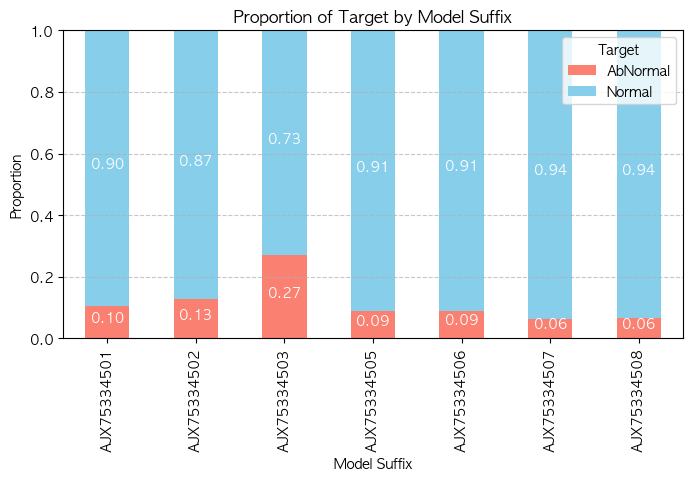

In [47]:
### model suffix에 따른 타깃값

# model suffix와 target 값에 따른 비율 계산
count_df = df_fill2.groupby(['Model.Suffix', 'target']).size().unstack(fill_value=0)

# 각 model suffix에 대해 target 비율 계산
count_df = count_df.div(count_df.sum(axis=1), axis=0)

# 비율 시각화
count_df.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], figsize=(8, 4))

plt.xlabel('Model Suffix')
plt.ylabel('Proportion')
plt.title('Proportion of Target by Model Suffix')
plt.legend(title='Target', loc='upper right')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 위에 비율 표시
for i in range(count_df.shape[0]):
    for j in range(count_df.shape[1]):
        plt.text(i, count_df.iloc[i, j] / 2 + count_df.iloc[i, :j].sum(), f"{count_df.iloc[i, j]:.2f}", ha='center', color='white')

plt.show()

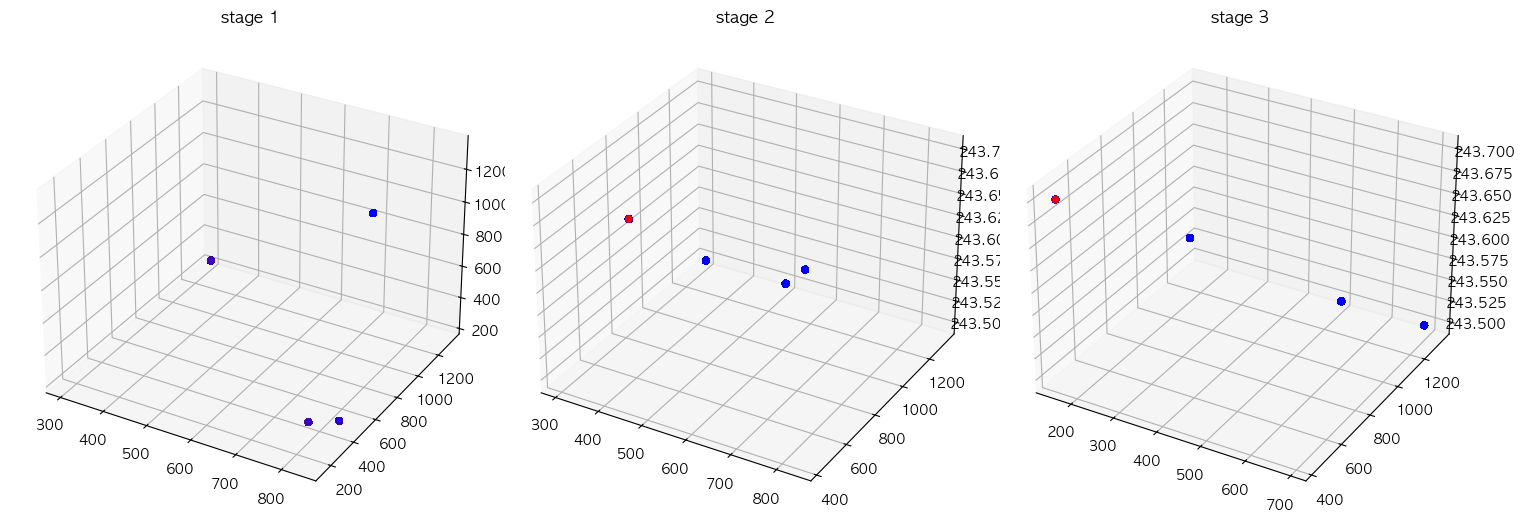

In [45]:
### 레진도포 노즐의 위치에 따른 타깃값 시각화

# 각 stage에 대한 3D Figure 생성
fig = plt.figure(figsize=(15, 10))

# 타깃값 색상 지정
color_map = {'AbNormal': 'red', 'Normal': 'blue'}
df_fill2['color'] = df_fill2['target'].map(color_map)

colors = df_fill2['color']

## stage 1
# 그래프 그리기 위해 OK 값은 최빈값 835.5로 채우고, null 값은 삭제
df_fill2.loc[df_fill2['Collect Result.17'] == 'OK', 'Collect Result.17'] = 835.5
#df_fill2['Collect Result.17'].fillna(835.5, inplace=True)
cleaned_cr17 = df_fill2[df_fill2['Collect Result.17'].notna()]

ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(df_fill2['Collect Result.17'], 
            df_fill2['Collect Result.20'], 
            df_fill2['Collect Result.23'], 
            c=colors, alpha=0.5)
ax1.set_title('stage 1')

## stage 2
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(df_fill2['Collect Result.18'], 
            df_fill2['Collect Result.21'], 
            df_fill2['Collect Result.24'], 
            c=colors, alpha=0.5)
ax2.set_title('stage 2')

## stage 3
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(df_fill2['Collect Result.19'], 
            df_fill2['Collect Result.22'], 
            df_fill2['Collect Result.25'], 
            c=colors, alpha=0.5)
ax3.set_title('stage 3')

# 그래프 표시
plt.tight_layout()
plt.show()

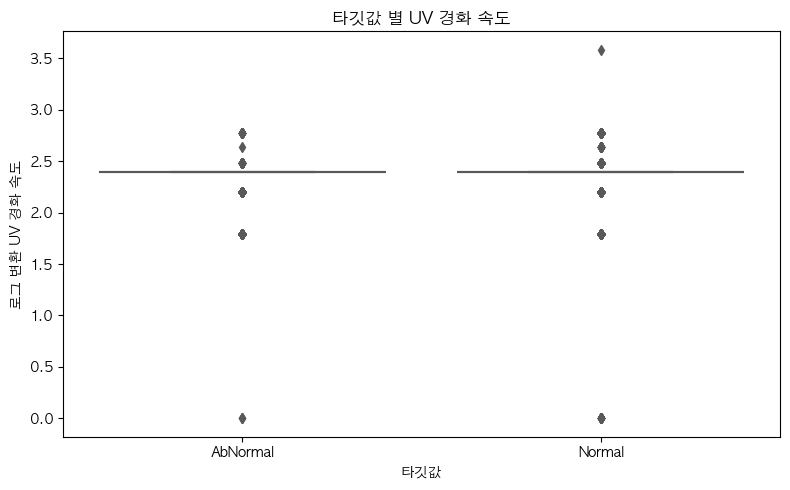

In [61]:
### 타깃값 별 UV 경화 속도

# 속도 데이터에 로그 변환 적용
df_fill2['log_cure_speed'] = np.log(df_fill2['Collect Result.3'] - df_fill2['Collect Result.3'].min() + 1) # 로그 변환 (0 이하 방지)

# 박스플롯 생성
plt.figure(figsize=(8, 5))
sns.boxplot(x='target', y='log_cure_speed', data=df_fill2, palette="Set2")

# 그래프 제목 및 레이블 설정
plt.title('타깃값 별 UV 경화 속도')
plt.ylabel('로그 변환 UV 경화 속도')
plt.xlabel('타깃값')

# 그래프 표시
plt.tight_layout()
plt.show()

-> 이상치: OP753345073120000171

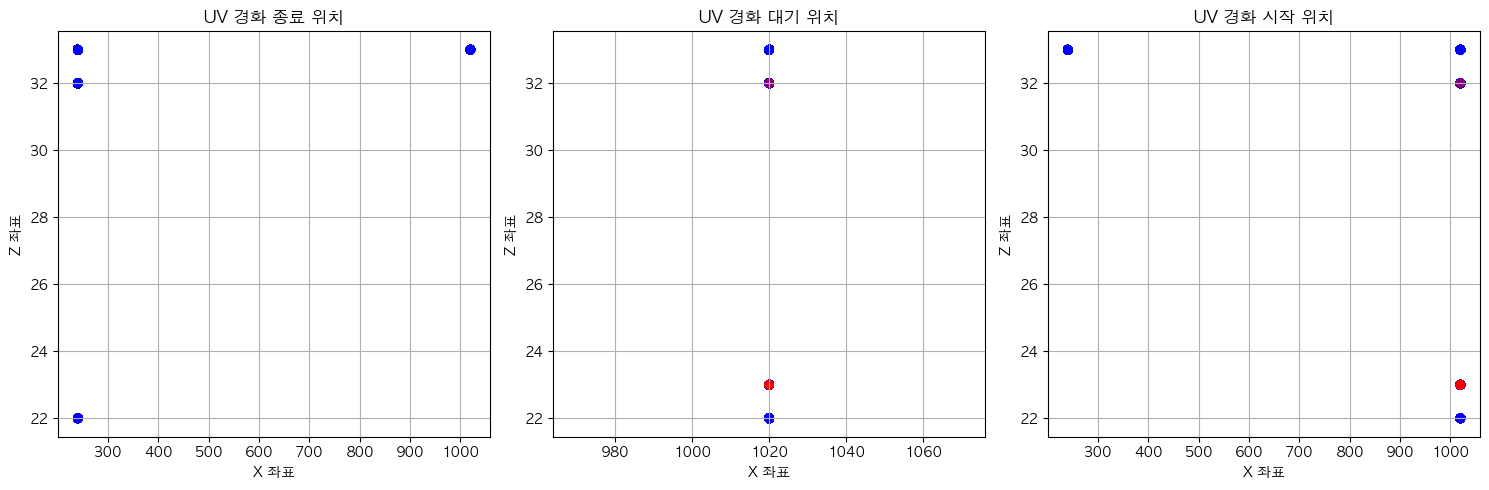

In [49]:
### UV 경화 위치에 따른 타깃값 시각화 - 2D

# 그래프 생성
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# 타깃값 색상 지정
color_map = {'AbNormal': 'red', 'Normal': 'blue'}
df_fill2['color'] = df_fill2['target'].map(color_map)

colors = df_fill2['color']

## UV 경화 종료 위치
axs[0].scatter(df_fill2['Collect Result'], 
               df_fill2['Collect Result.1'], 
               c=colors, alpha=0.5)
axs[0].set_title('UV 경화 종료 위치')
axs[0].set_xlabel('X 좌표')
axs[0].set_ylabel('Z 좌표')
axs[0].grid(True)

## UV 경화 대기 위치
axs[1].scatter(df_fill2['Collect Result.4'], 
               df_fill2['Collect Result.5'], 
               c=colors, alpha=0.5)
axs[1].set_title('UV 경화 대기 위치')
axs[1].set_xlabel('X 좌표')
axs[1].set_ylabel('Z 좌표')
axs[1].grid(True)

## UV 경화 시작 위치
axs[2].scatter(df_fill2['Collect Result.7'], 
               df_fill2['Collect Result.8'], 
               c=colors, alpha=0.5)
axs[2].set_title('UV 경화 시작 위치')
axs[2].set_xlabel('X 좌표')
axs[2].set_ylabel('Z 좌표')
axs[2].grid(True)

# 그래프 표시
plt.tight_layout()
plt.show()

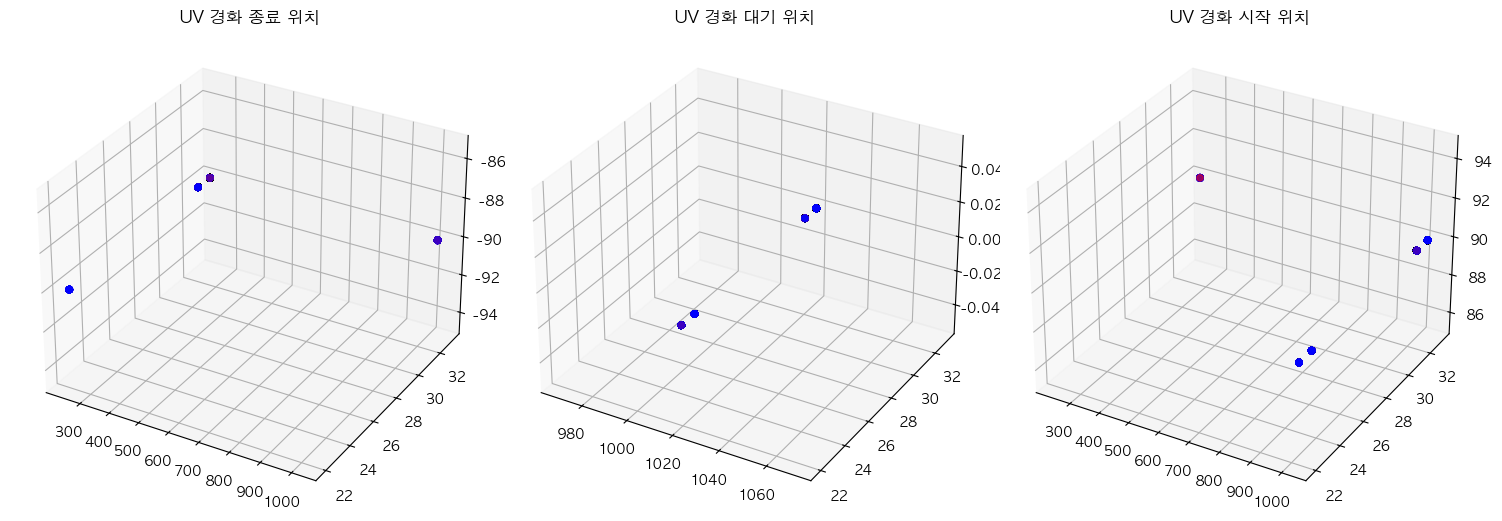

In [48]:
### UV 경화 위치에 따른 타깃값 시각화 - 3D

# 각 stage에 대한 3D Figure 생성
fig = plt.figure(figsize=(15, 10))

# 타깃값 색상 지정
color_map = {'AbNormal': 'red', 'Normal': 'blue'}
df_fill2['color'] = df_fill2['target'].map(color_map)

colors = df_fill2['color']

## UV 경화 종료 위치
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(df_fill2['Collect Result'], 
            df_fill2['Collect Result.1'], 
            df_fill2['Collect Result.2'],
            c=colors, alpha=0.5)
ax1.set_title('UV 경화 종료 위치')

## UV 경화 대기 위치
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(df_fill2['Collect Result.4'], 
            df_fill2['Collect Result.5'], 
            df_fill2['Collect Result.6'], 
            c=colors, alpha=0.5)
ax2.set_title('UV 경화 대기 위치')

## UV 경화 시작 위치
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(df_fill2['Collect Result.7'], 
            df_fill2['Collect Result.8'], 
            df_fill2['Collect Result.9'], 
            c=colors, alpha=0.5)
ax3.set_title('UV 경화 시작 위치')

# 그래프 표시
plt.tight_layout()
plt.show()

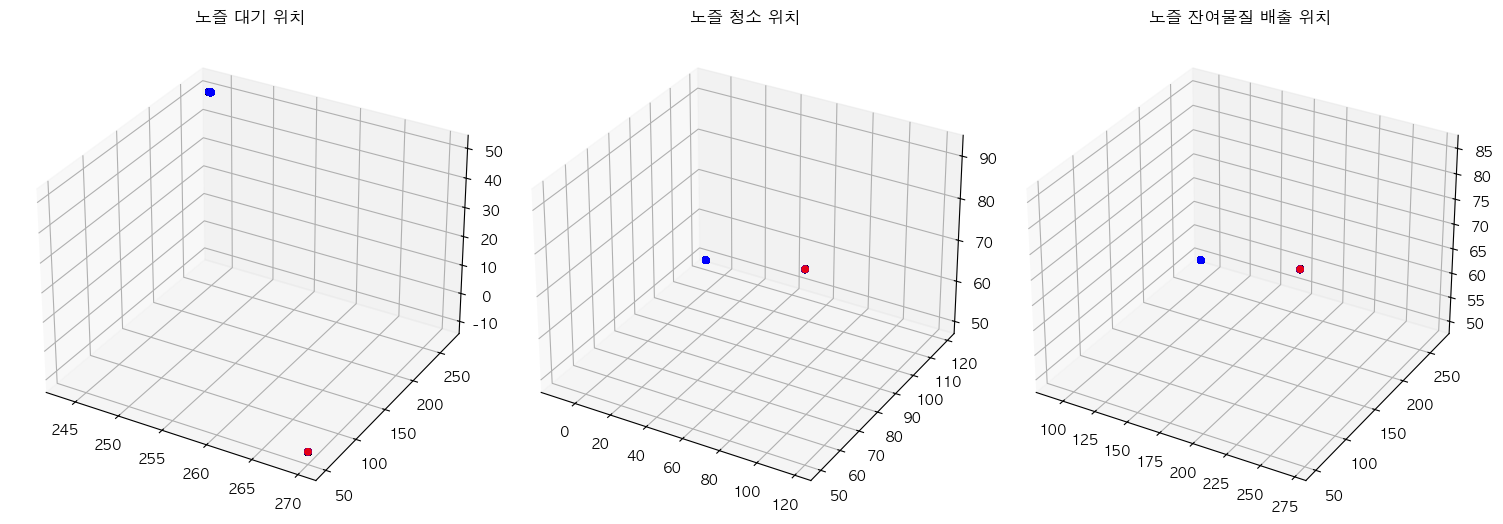

In [62]:
### 노즐 청소와 관련된 변수 시각화

# 각 stage에 대한 3D Figure 생성
fig = plt.figure(figsize=(15, 10))

# 타깃값 색상 지정
color_map = {'AbNormal': 'red', 'Normal': 'blue'}
df_fill2['color'] = df_fill2['target'].map(color_map)

colors = df_fill2['color']

## UV 경화 종료 위치
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(df_fill2['Collect Result.26'], 
            df_fill2['Collect Result.27'], 
            df_fill2['Collect Result.28'],
            c=colors, alpha=0.5)
ax1.set_title('노즐 대기 위치')

## UV 경화 대기 위치
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(df_fill2['Collect Result.29'], 
            df_fill2['Collect Result.30'], 
            df_fill2['Collect Result.31'], 
            c=colors, alpha=0.5)
ax2.set_title('노즐 청소 위치')

## UV 경화 시작 위치
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(df_fill2['Collect Result.32'], 
            df_fill2['Collect Result.33'], 
            df_fill2['Collect Result.34'], 
            c=colors, alpha=0.5)
ax3.set_title('노즐 잔여물질 배출 위치')

# 그래프 표시
plt.tight_layout()
plt.show()

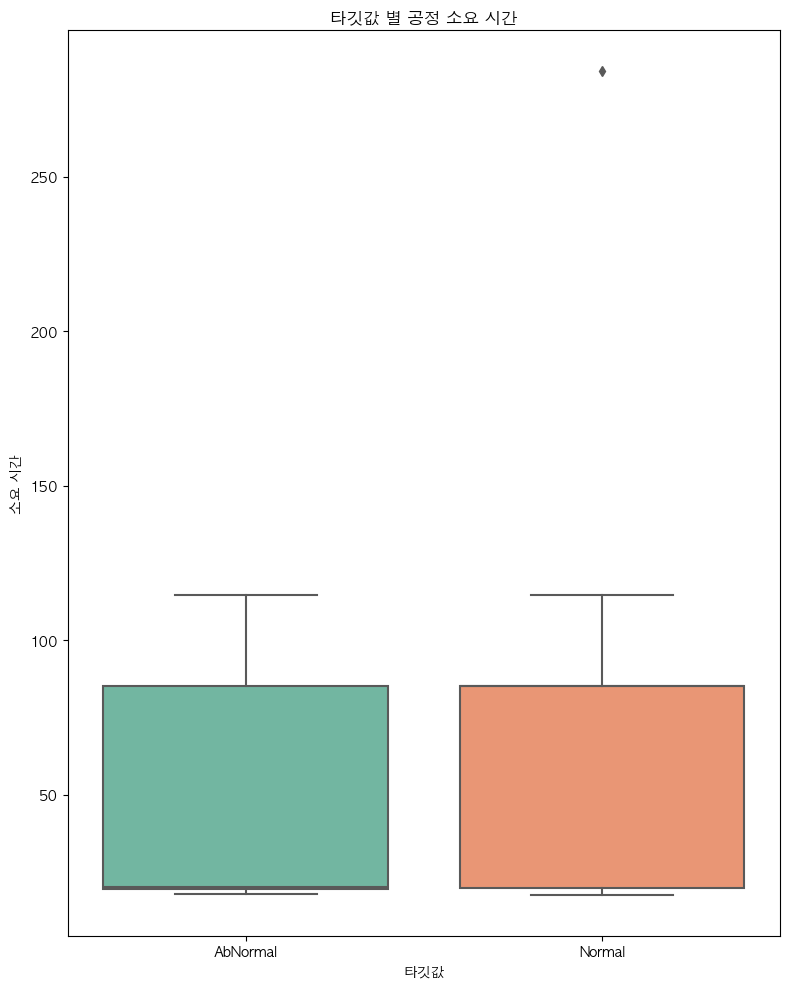

In [72]:
### 타깃값 별 fill2 dispensing 소요 시간

# 박스플롯 생성
plt.figure(figsize=(8, 10))
sns.boxplot(x='target', y='Collect Result.35', data=df_fill2, palette="Set2")

# 그래프 제목 및 레이블 설정
plt.title('타깃값 별 공정 소요 시간')
plt.ylabel('소요 시간')
plt.xlabel('타깃값')

# 그래프 표시
plt.tight_layout()
plt.show()